In [ ]:
# Hackbio internship

In [ ]:
!pip install chembl-webresource-client
!pip install rdkit-pypi
!pip install mordred


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.4 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=9e6a855e26fc7c6c4a6875617b597a1c78f87ae30998ac7e9f11866297dacc6a
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [ ]:
#import libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors


In [ ]:
## uploading my target
my_target = new_client.target
target_query = my_target.search('EGFR')


In [ ]:
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q01279', 'xref_name': None, 'xre...",Mus musculus,Epidermal growth factor receptor erbB1,16.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Epidermal growth factor receptor,11.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
5,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,11.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
6,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,10.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,10.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
8,[],Homo sapiens,ErbB-2/ErbB-3 heterodimer,10.0,False,CHEMBL4630723,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN COMPLEX,9606
9,"[{'xref_id': 'P04626', 'xref_name': None, 'xre...",Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9.0,False,CHEMBL1824,"[{'accession': 'P04626', 'component_descriptio...",SINGLE PROTEIN,9606


In [ ]:
seleceted_target = targets.target_chembl_id[9]
seleceted_target

'CHEMBL1824'

In [ ]:
## isolate the ic50 from the activity
activity = new_client.activity
res = activity.filter(target_chembl_id=seleceted_target).filter(standard_type="IC50")


In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.3
1,None,None,32266,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,None,32271,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.4
3,None,None,32273,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,1.21
4,None,None,47937,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1


In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-10-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.3
1,None,None,32266,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,2.5
2,None,None,32271,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.4
3,None,None,32273,[],CHEMBL615491,Inhibition of ligand induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,1.21
4,None,None,47937,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25073466,[],CHEMBL5253688,Inhibition of human recombinant ERBB2 expresse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,8730.0
4093,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25078778,[],CHEMBL5255145,Inhibition of HER2 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,1.31
4094,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25078779,[],CHEMBL5255145,Inhibition of HER2 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,1.98
4095,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25078780,[],CHEMBL5255145,Inhibition of HER2 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,0.96


In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32264,[],CHEMBL845865,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,None,32271,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.4
4,None,None,47937,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1
6,None,None,49330,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,5.0
8,None,None,50672,[],CHEMBL683802,Inhibition of autophosphorylation of human Her...,F,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,None,None,25070354,[],CHEMBL5252781,Inhibition of ERBB2 (unknown origin) autophosp...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.5
4091,None,None,25070355,[],CHEMBL5252781,Inhibition of ERBB2 (unknown origin) autophosp...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,uM,UO_0000065,None,0.5
4092,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25073466,[],CHEMBL5253688,Inhibition of human recombinant ERBB2 expresse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,8730.0
4095,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25078780,[],CHEMBL5255145,Inhibition of HER2 (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9606,None,None,IC50,nM,UO_0000065,None,0.96


In [ ]:
# select the id , smiles and ic50
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0
6,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0
8,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0
...,...,...,...
4090,CHEMBL4104297,Nc1nccc(Oc2ccc3c(C(=O)Nc4cccc(C(F)(F)F)c4)cccc...,500.0
4091,CHEMBL4080062,O=C(Nc1cccc(C(F)(F)F)c1)c1cccc2cc(Oc3cc(CO)ncn...,500.0
4092,CHEMBL5270270,COc1cc2ncnc(NCCOc3ccccc3F)c2cc1OC,8730.0
4095,CHEMBL5282641,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,0.96


In [ ]:
# classify the bioactivity
bioactivity_class = []
for i in df3.standard_value:
      if float(i) >= 10000:
        bioactivity_class.append("inactive")
      elif float(i) <= 1000:
        bioactivity_class.append("active")
      else:
        bioactivity_class.append("intermediate")


In [ ]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivty_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active
6,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0,intermediate
8,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0,active
...,...,...,...,...
2654,NaN,NaN,NaN,intermediate
2655,NaN,NaN,NaN,intermediate
2657,NaN,NaN,NaN,intermediate
2695,NaN,NaN,NaN,active


Calculate Lipinski descriptors

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np


In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

In [ ]:
df_lipinski = lipinski(df4.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,559.630,4.82482,3.0,7.0
3,470.533,3.31052,3.0,6.0
4,525.972,3.20392,4.0,7.0
...,...,...,...,...
2715,424.382,5.27540,2.0,5.0
2716,439.393,5.18550,2.0,5.0
2717,343.358,3.27700,1.0,6.0
2718,547.414,5.54280,1.0,7.0


In [ ]:
# combined df4 and df_lipinski
df_combined = pd.concat([df4,df_lipinski], axis=1)
df_combined.head(5)


,molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,active,383.814,4.45034,3.0,4.0
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.0,active,559.630,4.82482,3.0,7.0
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.0,active,525.972,3.20392,4.0,7.0
6,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.0,intermediate,413.796,3.84012,4.0,5.0
8,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.0,active,495.946,3.52952,3.0,6.0


Convert IC50 to pIC50



In [ ]:
#Import library
import numpy as np
#convert IC50 to pIC50
def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        try: # this will try to convert i to a float
            i = float(i)
        except ValueError: # if i is not a number, set molar to 0
            molar = 0
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)

    return x


In [ ]:
# describe
df_combined.standard_value.describe()


,standard_value
count,2720
unique,987
top,1000.0
freq,231


In [ ]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,6.397940
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,525.972,3.20392,4.0,7.0,7.000000
6,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,413.796,3.84012,4.0,5.0,5.301030
8,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,495.946,3.52952,3.0,6.0,7.000000
...,...,...,...,...,...,...,...,...
2654,NaN,NaN,intermediate,462.446,7.67290,0.0,3.0,NaN
2655,NaN,NaN,intermediate,462.446,7.67290,0.0,3.0,NaN
2657,NaN,NaN,intermediate,478.901,8.18720,0.0,3.0,NaN
2695,NaN,NaN,active,519.569,4.44480,2.0,10.0,NaN


In [ ]:
df_cleaned = df_final.dropna()
df_cleaned

,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
2,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,6.397940
4,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,525.972,3.20392,4.0,7.0,7.000000
6,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,413.796,3.84012,4.0,5.0,5.301030
8,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,495.946,3.52952,3.0,6.0,7.000000
...,...,...,...,...,...,...,...,...
2715,CHEMBL2048795,O=C1Cc2cccc(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)c2N1,active,424.382,5.27540,2.0,5.0,8.823909
2716,CHEMBL2048794,O=C1NCc2cccc(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)c21,active,439.393,5.18550,2.0,5.0,8.602060
2717,CHEMBL2048793,O=C1NCc2c(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)cccc21,intermediate,343.358,3.27700,1.0,6.0,6.823909
2718,CHEMBL2048792,O=C1Cc2ccc(Oc3ccc(Nc4ncnc5ccn(CCO)c45)cc3Cl)cc2N1,active,547.414,5.54280,1.0,7.0,6.886057


In [ ]:
#subset the pIC50
pIC = df_final[("pIC50")]


In [ ]:
df_cleaned.pIC50.describe()


,pIC50
count,1549.000000
mean,6.309241
std,1.340864
min,2.795880
25%,5.032920
50%,6.494850
75%,7.397940
max,9.301030


## Exploratory Data analysis via Lipinski descriptors

In [ ]:
# see how the data looks like
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


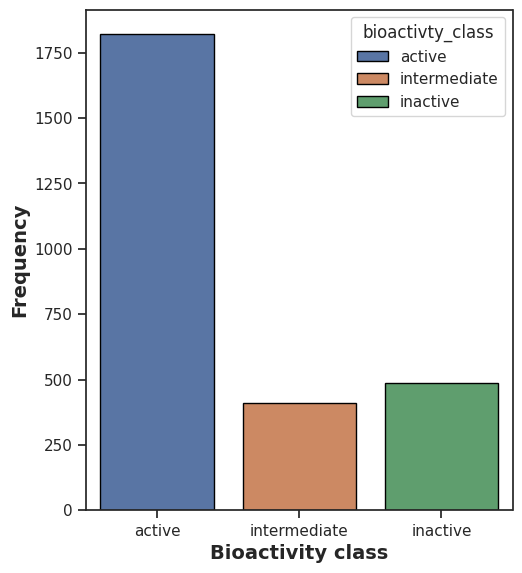

In [ ]:
plt.figure(figsize=(5.5, 6.5))

# Check if the column name is 'class' or 'bioactivity_class'
sns.countplot(x='bioactivty_class', data=df_final, edgecolor='black', hue = 'bioactivty_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


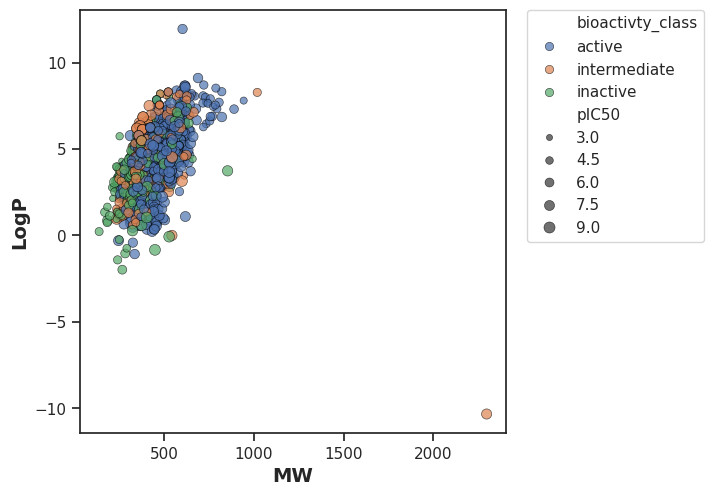

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivty_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')


In [ ]:
#subset the pIC50
pIC = df_final[("pIC50")]


In [ ]:
def canonical_smiles(smiles):
    mol = [Chem.MolFromSmiles(i) for i in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mol]
    return smiles


In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


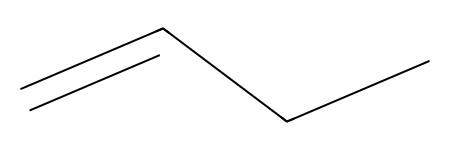

In [ ]:
Chem.MolFromSmiles('C=CCC')

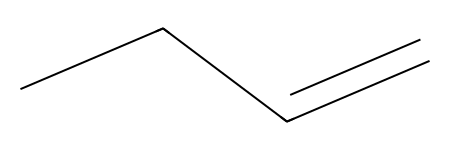

In [ ]:
Chem.MolFromSmiles('CCC=C')

Calculate descriptors using RDkit



In [ ]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names


In [ ]:
# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df_cleaned["canonical_smiles"])


In [ ]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136,0,...,0,0,0,0,0,0,0,0,0,0
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174,0,...,0,0,0,0,0,0,0,0,0,0
2,14.185096,-4.000864,14.185096,0.050803,0.256855,559.630,530.398,559.233188,210,0,...,0,0,0,0,0,0,0,0,0,0
3,14.068559,-3.974755,14.068559,0.082732,0.504608,470.533,444.325,470.206639,178,0,...,0,0,0,0,0,0,0,0,0,0
4,14.452691,-4.525910,14.452691,0.035848,0.349110,525.972,500.772,525.169144,192,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,12.500577,-3.490523,12.500577,0.011240,0.421090,435.871,417.727,435.109817,156,0,...,0,0,0,0,0,0,0,0,0,0
1545,12.863205,-3.491380,12.863205,0.100640,0.424901,435.871,417.727,435.109817,156,0,...,0,0,0,0,0,0,0,0,0,0
1546,12.614692,-3.492048,12.614692,0.099882,0.424901,435.871,417.727,435.109817,156,0,...,0,0,0,0,0,0,0,0,0,0
1547,12.322669,-3.486362,12.322669,0.005565,0.421090,435.871,417.727,435.109817,156,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fp_pIC = pd.concat([df_with_200_descriptors, df_lipinski, pIC,], axis=1)


In [ ]:
fp_pIC.head()


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,383.814,4.45034,3.0,4.0,6.522879
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174.0,0.0,...,0.0,0.0,0.0,0.0,0.0,482.903,3.61432,3.0,6.0,NaN
2,14.185096,-4.000864,14.185096,0.050803,0.256855,559.630,530.398,559.233188,210.0,0.0,...,0.0,0.0,0.0,0.0,0.0,559.630,4.82482,3.0,7.0,6.397940
3,14.068559,-3.974755,14.068559,0.082732,0.504608,470.533,444.325,470.206639,178.0,0.0,...,0.0,0.0,0.0,0.0,0.0,470.533,3.31052,3.0,6.0,NaN
4,14.452691,-4.525910,14.452691,0.035848,0.349110,525.972,500.772,525.169144,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,525.972,3.20392,4.0,7.0,7.000000


In [ ]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,383.814,4.45034,3.0,4.0,6.522879
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174.0,0.0,...,0.0,0.0,0.0,0.0,0.0,482.903,3.61432,3.0,6.0,NaN
2,14.185096,-4.000864,14.185096,0.050803,0.256855,559.630,530.398,559.233188,210.0,0.0,...,0.0,0.0,0.0,0.0,0.0,559.630,4.82482,3.0,7.0,6.397940
3,14.068559,-3.974755,14.068559,0.082732,0.504608,470.533,444.325,470.206639,178.0,0.0,...,0.0,0.0,0.0,0.0,0.0,470.533,3.31052,3.0,6.0,NaN
4,14.452691,-4.525910,14.452691,0.035848,0.349110,525.972,500.772,525.169144,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,525.972,3.20392,4.0,7.0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.301030
4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.301030
4092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.058986
4095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.017729


In [ ]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.drop('MW', axis=1)


In [ ]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.45034,3.0,4.0,6.522879
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.61432,3.0,6.0,NaN
2,14.185096,-4.000864,14.185096,0.050803,0.256855,559.630,530.398,559.233188,210.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.82482,3.0,7.0,6.397940
3,14.068559,-3.974755,14.068559,0.082732,0.504608,470.533,444.325,470.206639,178.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.31052,3.0,6.0,NaN
4,14.452691,-4.525910,14.452691,0.035848,0.349110,525.972,500.772,525.169144,192.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.20392,4.0,7.0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.301030
4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.301030
4092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.058986
4095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.017729


In [ ]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.dropna()


## Model Training Set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


In [ ]:
#define X and Y
X= fp_pIC.drop(columns=['pIC50'])
Y=fp_pIC.pIC50


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split the data into trainig(80%) and testing sets(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
#remove Ipc column from X_train, X_test, Y_train, Y_test

if 'Ipc' in X_train.columns:
  X_train = X_train.drop('Ipc', axis=1)
if 'Ipc' in X_test.columns:
  X_test = X_test.drop('Ipc', axis=1)


In [ ]:
#Print the shapes of the training and testing sets to confirm
print(f"Training set size: X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, Y_test: {Y_test.shape}")


Training set size: X_train: (1003, 210), Y_train: (1003,)
Testing set size: X_test: (251, 210), Y_test: (251,)


In [ ]:
Model= RandomForestRegressor(n_estimators=100, random_state=42)
Model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, mae, r2


In [ ]:
Model_metrics = evaluate_model(Model, X_test, Y_test)

In [ ]:
print("Random Forest - MSE:", Model_metrics[0], "MAE:", Model_metrics[1], "R²:", Model_metrics[2])

Random Forest - MSE: 1.492646110288079 MAE: 0.9737631289401572 R²: 0.22313885205428363


## Model Selection

In [ ]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles


In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole




In [ ]:
#generate a dataframe with ligand and smiles column

ligand_smiles_df = pd.DataFrame({'Ligand': ['Demethoxycurcumin', 'Bisdemethoxycurcumin','ar-Turmerone' ],
                                'Smiles': ['COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O',
                                        'C1=CC(=CC=C1/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O',
                                           'CC1=CC=C(C=C1)[C@@H](C)CC(=O)C=C(C)C']})
print(ligand_smiles_df)


                 Ligand                                             Smiles
0     Demethoxycurcumin  COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C...
1  Bisdemethoxycurcumin  C1=CC(=CC=C1/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O
2          ar-Turmerone               CC1=CC=C(C=C1)[C@@H](C)CC(=O)C=C(C)C


In [ ]:
# Run Lipinski on the new DataFrame
ligand_lipinski = lipinski(ligand_smiles_df.Smiles)
ligand_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,338.359,3.36130,2.0,5.0
1,308.333,3.35270,2.0,4.0
2,216.324,4.02392,0.0,1.0


In [ ]:
ligand =RDkit_descriptors(ligand_smiles_df["Smiles"])
ligand = pd.DataFrame(ligand[0], columns=ligand[1],)
ligand

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.909481,-3.911317,12.909481,0.851868,0.597270,338.359,320.215,338.115424,128,0,...,0,0,0,0,0,0,0,0,0,0
1,12.755055,-3.822254,12.755055,0.825560,0.633680,308.333,292.205,308.104859,116,0,...,0,0,0,0,0,0,0,0,0,0
2,12.988293,-4.246962,12.988293,1.172041,0.694542,216.324,196.164,216.151415,86,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: concatenate ligans, ligand_lipinski and ligand_smiles_df

ligand_combined = pd.concat([ligand_smiles_df, ligand_lipinski,ligand], axis=1)
ligand_combined


,Ligand,Smiles,MW,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Demethoxycurcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C...,338.359,3.36130,2.0,5.0,12.909481,-3.911317,12.909481,0.851868,...,0,0,0,0,0,0,0,0,0,0
1,Bisdemethoxycurcumin,C1=CC(=CC=C1/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O,308.333,3.35270,2.0,4.0,12.755055,-3.822254,12.755055,0.825560,...,0,0,0,0,0,0,0,0,0,0
2,ar-Turmerone,CC1=CC=C(C=C1)[C@@H](C)CC(=O)C=C(C)C,216.324,4.02392,0.0,1.0,12.988293,-4.246962,12.988293,1.172041,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#remove smiles column
ligand_combined = ligand_combined.drop('Smiles', axis=1)
ligand_combined


,Ligand,MW,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Demethoxycurcumin,338.359,3.36130,2.0,5.0,12.909481,-3.911317,12.909481,0.851868,0.597270,...,0,0,0,0,0,0,0,0,0,0
1,Bisdemethoxycurcumin,308.333,3.35270,2.0,4.0,12.755055,-3.822254,12.755055,0.825560,0.633680,...,0,0,0,0,0,0,0,0,0,0
2,ar-Turmerone,216.324,4.02392,0.0,1.0,12.988293,-4.246962,12.988293,1.172041,0.694542,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#remove MW column due to duplication
ligand_combined = ligand_combined.drop('MW', axis=1)
ligand_combined


,Ligand,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Demethoxycurcumin,3.36130,2.0,5.0,12.909481,-3.911317,12.909481,0.851868,0.597270,338.359,...,0,0,0,0,0,0,0,0,0,0
1,Bisdemethoxycurcumin,3.35270,2.0,4.0,12.755055,-3.822254,12.755055,0.825560,0.633680,308.333,...,0,0,0,0,0,0,0,0,0,0
2,ar-Turmerone,4.02392,0.0,1.0,12.988293,-4.246962,12.988293,1.172041,0.694542,216.324,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#add pIC50 column
df_ligand_combined = pd.concat([ligand_combined, df_cleaned['pIC50']], axis=1)
df_ligand_combined


,Ligand,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,Demethoxycurcumin,3.36130,2.0,5.0,12.909481,-3.911317,12.909481,0.851868,0.597270,338.359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
1,Bisdemethoxycurcumin,3.35270,2.0,4.0,12.755055,-3.822254,12.755055,0.825560,0.633680,308.333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,ar-Turmerone,4.02392,0.0,1.0,12.988293,-4.246962,12.988293,1.172041,0.694542,216.324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.397940
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.823909
2716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.602060
2717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.823909
2718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.886057


In [ ]:
#drop NaN
df_ligand_combined = df_ligand_combined.dropna()
df_ligand_combined


,Ligand,LogP,NumHDonors,NumHAcceptors,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,pIC50
0,Demethoxycurcumin,3.36130,2.0,5.0,12.909481,-3.911317,12.909481,0.851868,0.597270,338.359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
2,ar-Turmerone,4.02392,0.0,1.0,12.988293,-4.246962,12.988293,1.172041,0.694542,216.324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.397940


In [ ]:
#create final ligand table without Ipc and ligand columns (cleaning for modeling)

# Remove 'Ligand' and 'pIC50' columns
final_ligand_table = df_ligand_combined.drop(['Ligand', 'Ipc'], axis=1)

# Display the final ligand table
print(final_ligand_table)


      LogP  NumHDonors  NumHAcceptors  MaxEStateIndex  MinEStateIndex  \
0  3.36130         2.0            5.0       12.909481       -3.911317   
2  4.02392         0.0            1.0       12.988293       -4.246962   

   MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  \
0          12.909481           0.851868  0.597270  338.359         320.215   
2          12.988293           1.172041  0.694542  216.324         196.164   

   ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0.0         0.0                0.0           0.0   
2  ...           0.0         0.0                0.0           0.0   

   fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea     pIC50  
0          0.0          0.0           0.0               0.0      0.0  6.522879  
2          0.0          0.0           0.0               0.0      0.0  6.397940  

[2 rows x 211 columns]


In [ ]:
#define X and Y
X_LIGAND= final_ligand_table.drop(columns=['pIC50'])
Y_LIGAND=final_ligand_table.pIC50


In [ ]:
Model.fit(X_LIGAND, Y_LIGAND)

RandomForestRegressor(random_state=42)

In [ ]:
#pIC50 prediction of ligands
ligand_prediction = Model.predict(X_LIGAND)
ligand_prediction


array([6.49539222, 6.43042408])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


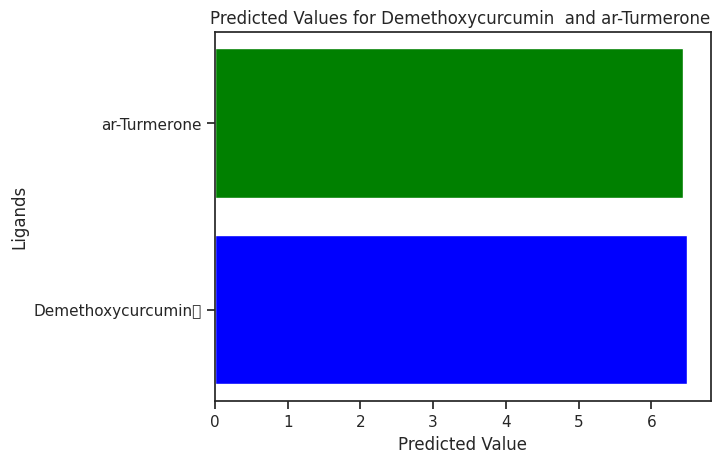

In [ ]:
import matplotlib.pyplot as plt

ligands = ['Demethoxycurcumin	', 'ar-Turmerone']
predicted_values = [6.49539222, 6.43042408]

plt.barh(ligands, predicted_values, color=['blue', 'green'])
plt.title('Predicted Values for Demethoxycurcumin  and ar-Turmerone ')
plt.xlabel('Predicted Value')
plt.ylabel('Ligands')
plt.show()


In [ ]:
mse_LIGAND = mean_squared_error(Y_LIGAND, ligand_prediction)
mae_LIGAND = mean_absolute_error(Y_LIGAND, ligand_prediction)
r2_LIGAND = r2_score(Y_LIGAND, ligand_prediction)


In [ ]:
print(f"MSE_Ligand: {mse_LIGAND}, MAE_Ligand: {mae_LIGAND}, R-squared_Ligand: {r2_LIGAND}")

MSE_Ligand: 0.000905361898506587, MAE_Ligand: 0.029985296785999704, R-squared_Ligand: 0.7679999999998834


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
if 'Ipc' in X_train.columns:
  X_train = X_train.drop('Ipc', axis=1)


In [ ]:
if 'Ipc' in X_test.columns:
  X_test = X_test.drop('Ipc', axis=1)


In [ ]:
# remove Ipc from X and Y and Model

if 'Ipc' in X.columns:
  X = X.drop('Ipc', axis=1)

# Y is a series, so we don't need to remove a column.
# If you meant to remove rows with NaN in Y, you can use:
# Y = Y.dropna()

# Refit the model without Ipc
Model = RandomForestRegressor(n_estimators=100, random_state=42)
Model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# prompt: cross validation of model

cv_scores = cross_val_score(Model, X, Y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")


Cross-validation scores: [-0.66455977 -0.2656277  -0.16391705 -0.23983115 -0.04575614]
Mean cross-validation score: -0.2759383628517974
